In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [1]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

독립 변수의 공분산 행렬의 조건수를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킨다.

In [4]:
x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
x = np.vstack([x, [20]])  # outlier
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [5.84333333 3.054      3.75866667 1.19866667]
old std:  [0.82530129 0.43214658 1.75852918 0.76061262]
new mean: [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
new std:  [1. 1. 1. 1.]


/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [5.84333333 3.054      3.75866667 1.19866667]
old std:  [0.82530129 0.43214658 1.75852918 0.76061262]
new mean: [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
new std:  [1. 1. 1. 1.]


In [8]:
data1[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data1)
data2 = sc.transform(data1)
data1.std(), data2.std()

(1.974000985027335, 1.0)

In [11]:
from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [2. 1. 0. 1. 2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [1. 1. 1. 1. 1.]


정규화는 다차원 독립 변수 벡터가 있을 때 각 벡터 원소들의 상대적 크기만 중요한 경우에 사용된다.

- n_values_ : 각 변수의 최대 클래스 갯수
- feature_indices_ : 입력이 벡터인 경우 각 원소를 나타내는 슬라이싱(slice) 정보
- active_features_ : 실제로 사용된 클래스 번호의 리스트

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [13]:
X = np.array([[0], [1], [2]])
X

array([[0],
       [1],
       [2]])

In [14]:
ohe.fit(X)
ohe.n_values_ , ohe.feature_indices_ , ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

In [15]:
ohe.transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

ohe object는 하나의 동일한 categorical variable에 fit , transform 메소드를 적용시켜 주어야 한다.

In [23]:
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 
X

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [24]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_ , ohe.active_features_

(array([2, 3, 5]), array([ 0,  2,  5, 10]), array([0, 1, 2, 3, 4, 5, 6, 7, 9]))

In [25]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

In [26]:
from sklearn.preprocessing import Imputer

In [28]:
imp = Imputer(missing_values='NaN',strategy='mean',axis=0)
imp.fit_transform([[1, 2], [np.nan, 3], [7, 6]])

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

In [29]:
from sklearn.preprocessing import Binarizer

In [30]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
binarizer = Binarizer().fit(X) 
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [31]:
binarizer = Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [35]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [36]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [37]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
y = ['A','B','A','A','B','C','C','A','C','B']
le.fit(y)
le.classes_

array(['A', 'B', 'C'], dtype='<U1')

In [42]:
y2 = le.transform(y)
y2

array([0, 1, 0, 0, 1, 2, 2, 0, 2, 1])

In [43]:
le.inverse_transform(y2)

array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'], dtype='<U1')

In [46]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
lb.fit(y)
lb.classes_

array(['A', 'B', 'C'], dtype='<U1')

In [47]:
y2 = lb.transform(y)
y2

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [48]:
lb.inverse_transform(y2)

array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'], dtype='<U1')

## Overall
- preprocessing has two process and I should understand what they mean
    - 1)  fit() : Compute the mean and std to be used for later scaling.
    - 2)  transform() : Perform standardization by centering and scaling
    - 1+2) fit_transform() : Fit to data, then transform it.

In [100]:
from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(data)
print(scaler.fit(data))

print(scaler.mean_)

print(scaler.transform(data))




print(scaler.transform([[2, 2]]))

[[0, 0], [0, 0], [1, 1], [1, 1]]
StandardScaler(copy=True, with_mean=True, with_std=True)
[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


In [79]:
data=np.arange(100).reshape(10,10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
data2 = sc.transform(data)
data2,data2.shape

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(array([[-1.5666989 , -1.5666989 , -1.5666989 , -1.5666989 , -1.5666989 ,
         -1.5666989 , -1.5666989 , -1.5666989 , -1.5666989 , -1.5666989 ],
        [-1.21854359, -1.21854359, -1.21854359, -1.21854359, -1.21854359,
         -1.21854359, -1.21854359, -1.21854359, -1.21854359, -1.21854359],
        [-0.87038828, -0.87038828, -0.87038828, -0.87038828, -0.87038828,
         -0.87038828, -0.87038828, -0.87038828, -0.87038828, -0.87038828],
        [-0.52223297, -0.52223297, -0.52223297, -0.52223297, -0.52223297,
         -0.52223297, -0.52223297, -0.52223297, -0.52223297, -0.52223297],
        [-0.17407766, -0.17407766, -0.17407766, -0.17407766, -0.17407766,
         -0.17407766, -0.17407766, -0.17407766, -0.17407766, -0.17407766],
        [ 0.17407766,  0.17407766,  0.17407766,  0.17407766,  0.17407766,
          0.17407766,  0.17407766,  0.17407766,  0.17407766,  0.17407766],
        [ 0.52223297,  0.52223297,  0.52223297,  0.52223297,  0.52223297,
          0.52223297,  0.5222329

In [97]:
data.mean(),data.std()

(49.5, 28.86607004772212)

In [81]:
data3 = np.arange(100,200).reshape(10,10)
data3

array([[100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
       [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
       [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
       [140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
       [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
       [160, 161, 162, 163, 164, 165, 166, 167, 168, 169],
       [170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
       [180, 181, 182, 183, 184, 185, 186, 187, 188, 189],
       [190, 191, 192, 193, 194, 195, 196, 197, 198, 199]])

In [98]:
(100-data.mean())/data.std()

1.7494587907710375

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
data4 = sc.transform(data3)
data4,data4.shape

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(array([[1.91485422, 1.91485422, 1.91485422, 1.91485422, 1.91485422,
         1.91485422, 1.91485422, 1.91485422, 1.91485422, 1.91485422],
        [2.26300953, 2.26300953, 2.26300953, 2.26300953, 2.26300953,
         2.26300953, 2.26300953, 2.26300953, 2.26300953, 2.26300953],
        [2.61116484, 2.61116484, 2.61116484, 2.61116484, 2.61116484,
         2.61116484, 2.61116484, 2.61116484, 2.61116484, 2.61116484],
        [2.95932015, 2.95932015, 2.95932015, 2.95932015, 2.95932015,
         2.95932015, 2.95932015, 2.95932015, 2.95932015, 2.95932015],
        [3.30747546, 3.30747546, 3.30747546, 3.30747546, 3.30747546,
         3.30747546, 3.30747546, 3.30747546, 3.30747546, 3.30747546],
        [3.65563078, 3.65563078, 3.65563078, 3.65563078, 3.65563078,
         3.65563078, 3.65563078, 3.65563078, 3.65563078, 3.65563078],
        [4.00378609, 4.00378609, 4.00378609, 4.00378609, 4.00378609,
         4.00378609, 4.00378609, 4.00378609, 4.00378609, 4.00378609],
        [4.3519414 , 4.3519

## Classification
- feature 값이 주어졌을 대 그 feature 와 가장 연관성이 큰 종속변수 카테고리(class)를 계산하는 문제이다. 현실적인 문제로 바꾸어 말하면 어떤 표본에 대한 데이터가 주어졌을 때 그 표본이 어떤 카테고리 혹은 클래스에 속하는지를 알아내는 문제이기도 하다.

- 판별함수 모형(discriminant function model)
    - decision boundary를 찾고 이로부터 주어진 데이터가 어느 위치에 있는지를 계산한다. (by using discriminant function)
- 조건부 확률 모형(conditional probabiltiy model)
    - 주어진 데이터에 대해 각 카테고리 혹은 클래스가 정답일 확률을 계산하는 방법에 따라
    - discriminative model
        - 직접 조건부 확률 함수를 추정하는 모델
    - generative
        - 베이즈 정리를 사용하는 모델

- 조건부 확률 기반 생성 모형
    - linear/QDA
    - Naive Bayes
- 조건부 확률 기반 판별 모형
    - logistic regresiion
    - decision tree
    - K Nearest Neighbor
- 판별 함수 기반 모형
    - perceptron
    - Support Vector Machine
    - Neural Network

### 조건부 확률 방법
- 조건부 확률 방법은 출력이 각각의 클래스 값일 확률을 모두 계산해서 그중 확률이 큰 클래스를 선택하는 방법이다.
- `P_1 = P(y=C_1 | x_test) ,.., P_k = P(y=C_k | x_test)` 

### 조건부 확률 기반 생성 모형
- 클래스가 3개 이상인 경우에도 바로 적용할 수 있다는 장점이 있다.
- QDA , Naive Bayes 등이 있다.

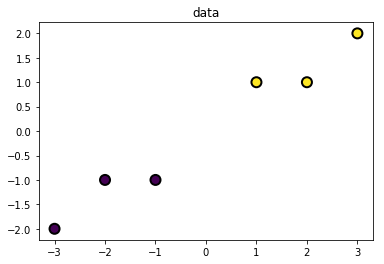

In [101]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.title("data")
plt.show()

In [102]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X, y)

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [107]:
model.classes_

array([0, 1])

In [111]:
x = [[0,0]]
p = model.predict_proba(x)[0]
p

array([0.5, 0.5])

- 조건부 확률 기반 생성 모형은 조건부 확률을 구하기 위해 우선 우도(likelihood)를 구하고 베이즈 정리를 사용하여 조건부 확률을 계산한다.
- 확률론적 판별 모형은 조건부 확률이 바로 어떤 함수로 표시될 수 있다고 가정하고 그 함수를 직접 찾아낸다. 
    - logistic regression model 등이 있다.

### 판별 함수 기반 모형
- 동일한 클래스가 모여 있는 영역과 그 영역을 나누는 경계면(boudary plane)을 정의하는 것이다. 이는 판별 함수로 정의된다.
    - boundary plane : f(x) = 0
    - class 1 : f(x) > 0
    - class 2 : f(x) < 0
    - perceptron , Kernel Support Vector Machine 등이 있다.